In [1]:
%matplotlib widget
from easydynamics.Analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
# from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.Experiment import Experiment

import matplotlib.pyplot as plt


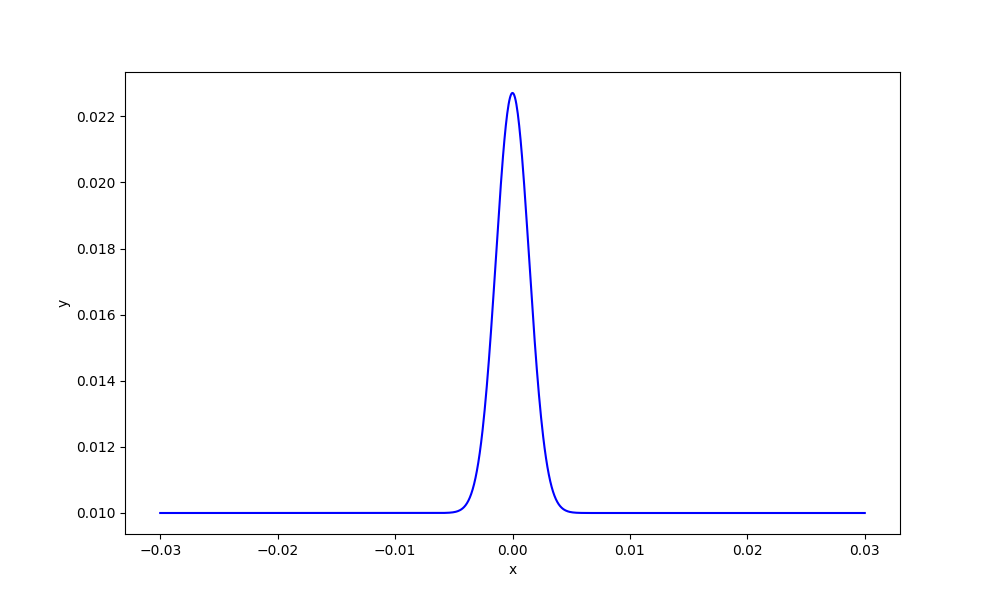

In [13]:

MyAnalysis = Analysis(name='MyAnalysis')


# Gaussian1= GaussianComponent(center=0,width=0.3,amplitude=1)
Gaussian1= GaussianComponent(center=0,width=1e-3,amplitude=0.05)
Gaussian2= GaussianComponent(center=0,width=1e-3,amplitude=1.3)
Lorentzian=LorentzianComponent(center=0, width=4e-3, amplitude=1.1)
# DHO=DHOComponent(center=1, width=0.3, area=1.2)
# Background=PolynomialComponent(coefficients=[0.1])

Sample= SampleModel()
Sample.add_component(Gaussian1)
Sample.add_component(Lorentzian)
# Sample.add_component(Background)
# Sample.add_component(DHO)


Resolution=SampleModel()
Resolution.add_component(Gaussian2)

Background=SampleModel()
Background.add_component(PolynomialComponent(coefficients=[0.01]))

MyAnalysis.set_sample_model(Sample)
MyAnalysis.set_resolution_model(Resolution)
MyAnalysis.set_background_model(Background)

x=np.linspace(-0.03, 0.03, 1000)
y=MyAnalysis.calculate_theory(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Theoretical Model', color='blue')
plt.xlabel('x')
plt.ylabel('y')

vanadium_data=Experiment.load_example_vanadium_data_1d()
vanadium_data.plot()

MyAnalysis.set_data(vanadium_data)

# fit_result=MyAnalysis.fit()


In [3]:
print(MyAnalysis.get_fit_parameters())


[<Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>, <Parameter 'width': 0.0001 meV, bounds=[-inf:inf]>, <Parameter 'amplitude': 0.0500, bounds=[-inf:inf]>, <Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>, <Parameter 'width': 0.4000 meV, bounds=[-inf:inf]>, <Parameter 'amplitude': 1.1000, bounds=[-inf:inf]>, <Parameter 'center': 0.0000 meV, bounds=[-inf:inf]>, <Parameter 'width': 0.5000 meV, bounds=[-inf:inf]>, <Parameter 'amplitude': 1.3000, bounds=[-inf:inf]>, <Parameter 'c0': 0.0100, bounds=[-inf:inf]>]


In [8]:

fit_result=MyAnalysis.fit()
# print(fit_result[0].n_pars)


# a=MyAnalysis.parameters
fit_result[0].p

c:\Users\henrikjacobsen3\.conda\envs\EasyQENSDev\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


{'pParameter_0': np.float64(0.0),
 'pParameter_1': np.float64(-24.612559668624666),
 'pParameter_2': np.float64(0.05),
 'pParameter_6': np.float64(1.290693464915741),
 'pParameter_7': np.float64(0.2338006889522529),
 'pParameter_8': np.float64(0.6429497644766032),
 'pParameter_3': np.float64(0.0),
 'pParameter_4': np.float64(0.45411820436178185),
 'pParameter_5': np.float64(0.7598530964791979),
 'pParameter_9': np.float64(-0.006444536257708318)}

In [5]:
vanadium_data.plot()

InteractiveFigure(children=(HBar(), HBar(children=(VBar(children=(Toolbar(children=(ButtonTool(icon='home', la…